In [14]:
import pandas as pd

In [15]:
df = pd.read_csv('./data/pm25_pm10_merged.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18575 entries, 0 to 18574
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           18575 non-null  object 
 1   City           18575 non-null  object 
 2   Longitude      18575 non-null  float64
 3   Latitude       18575 non-null  float64
 4   PM2.5 (µg/m³)  18575 non-null  float64
 5   PM10 (µg/m³)   18575 non-null  float64
dtypes: float64(4), object(2)
memory usage: 870.8+ KB


In [16]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# 데이터 로드
data = pd.read_csv("./data/pm25_pm10_merged.csv")  # 파일로 저장 후 로드 가정
data['Date'] = pd.to_datetime(data['Date'])

# 피벗 테이블 생성 (PM2.5)
pivot_data = data.pivot(index='Date', columns='City', values='PM2.5 (µg/m³)').reset_index()
pivot_data = pivot_data.fillna(0)  # 혹시 결측값이 있으면 0으로 채움

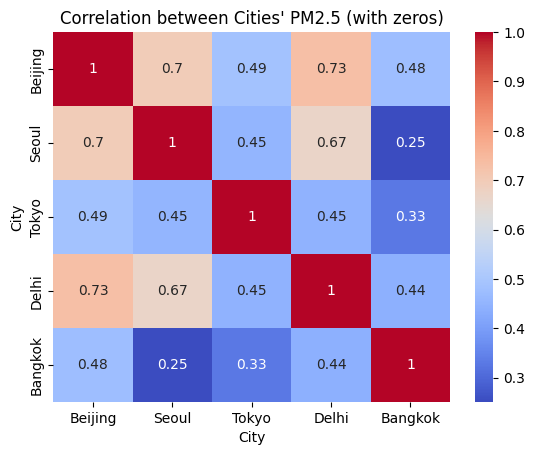

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# 상관 행렬 계산
correlation = pivot_data[['Beijing', 'Seoul', 'Tokyo', 'Delhi', 'Bangkok']].corr()
# 시각화
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title("Correlation between Cities' PM2.5 (with zeros)")
plt.savefig('../img/correlation.png')
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# 독립 변수(X)와 종속 변수(y) 설정
X = pivot_data[['Beijing']]  # 베이징 PM2.5
y = pivot_data[['Seoul', 'Tokyo', 'Delhi', 'Bangkok']]  # 다른 도시 PM2.5

# 데이터 분할 (훈련/테스트)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 모델 학습
model = LinearRegression()
model.fit(X_train, y_train)

# 테스트 데이터 예측
y_pred = model.predict(X_test)

# 성능 평가
mse = mean_squared_error(y_test, y_pred, multioutput='raw_values')
print("Mean Squared Error for each city (Seoul, Tokyo, Delhi, Bangkok):", mse)

Mean Squared Error for each city (Seoul, Tokyo, Delhi, Bangkok): [1502.76975962  150.2671935  5392.8436834  1603.63114938]


In [6]:
def predict_pm25(beijing_pm25):
    input_value = [[beijing_pm25]]
    predicted_pm25 = model.predict(input_value)
    cities = ['Seoul', 'Tokyo', 'Delhi', 'Bangkok']
    return dict(zip(cities, predicted_pm25[0]))

# 예시: 베이징 PM2.5 = 100 µg/m³
result = predict_pm25(100)
print("Predicted PM2.5 for other cities when Beijing PM2.5 = 100 µg/m³:")
for city, value in result.items():
    print(f"{city}: {value:.2f} µg/m³")

Predicted PM2.5 for other cities when Beijing PM2.5 = 100 µg/m³:
Seoul: 49.06 µg/m³
Tokyo: 18.55 µg/m³
Delhi: 106.75 µg/m³
Bangkok: 36.06 µg/m³


/opt/anaconda3/envs/pystudy_env/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


/var/folders/9s/h365kc_s4rnb9jvnmgth1cq40000gn/T/ipykernel_4583/639294343.py:39: UserWarning: Glyph 181 (\N{MICRO SIGN}) missing from current font.
  plt.tight_layout()
/var/folders/9s/h365kc_s4rnb9jvnmgth1cq40000gn/T/ipykernel_4583/639294343.py:40: UserWarning: Glyph 181 (\N{MICRO SIGN}) missing from current font.
  plt.savefig('../img/city_year_pm25.png')
/opt/anaconda3/envs/pystudy_env/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 181 (\N{MICRO SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


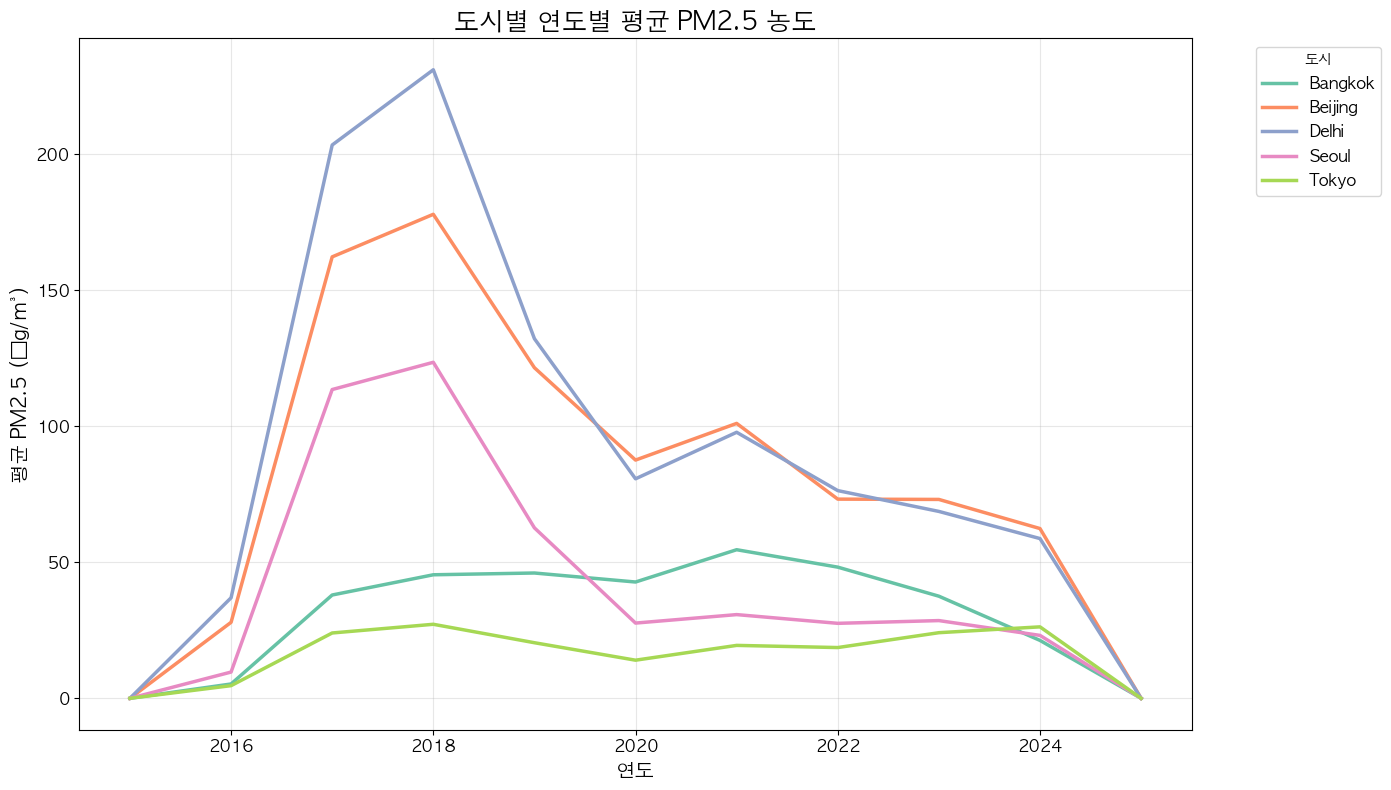

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.font_manager as fm
import matplotlib as mp
mp.rc('font',family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False


# 날짜를 datetime 형식으로 변환 및 연도 추출
data['Date'] = pd.to_datetime(data['Date'])
data['Year'] = data['Date'].dt.year

# 도시별 연도별 PM2.5 평균 계산
year_city_avg = data.groupby(['Year', 'City'], as_index=False)['PM2.5 (µg/m³)'].mean()

# 그래프 그리기
plt.figure(figsize=(14, 8))
sns.lineplot(
    x='Year', 
    y='PM2.5 (µg/m³)', 
    hue='City', 
    data=year_city_avg, 
    palette='Set2', 
    linewidth=2.5
)

# 그래프 설정
plt.title('도시별 연도별 평균 PM2.5 농도', fontsize=18, fontweight='bold')
plt.xlabel('연도', fontsize=14)
plt.ylabel('평균 PM2.5 (µg/m³)', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='도시', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12)
plt.grid(alpha=0.3)

# 그래프 저장 및 출력
plt.tight_layout()
plt.savefig('../img/city_year_pm25.png')
plt.show()
